## Parse Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def list_to_plate(lst: pd.Series) -> pd.DataFrame:
    new_index = pd.MultiIndex.from_tuples([(i[0], int(i[1:])) for i in lst.index])
    plate =  pd.Series(lst.values, index=new_index).unstack()
    return plate

def plate_to_list(plate: pd.DataFrame) -> pd.Series:
    s = plate.stack()
    s.index = [f'{row}{col}' for row, col in s.index]
    return s

def set_plate_axes(df: pd.DataFrame) -> pd.DataFrame:
    """ Given a dataframe representing a multiwell plate, set axes to be proper plate axes. """

    df.columns = range(1, len(df.columns)+1)
    df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'][:len(df.index)]
    return df

def bars(df, **kwargs):
    ax = sns.barplot(data=df,alpha=0.8, **kwargs)
    ax = sns.stripplot(data=df, ax=ax, size=6, dodge=True, legend=False,  edgecolor='black', linewidth=1, **kwargs)
    if 'hue' in kwargs.keys():
      plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    return ax


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from pathlib import Path
DRIVE_FOLDER = Path('/content/drive/Shared drives/Student Biolab Zurich/iDEC/iDEC 2024/Lab results/Phage Propagation Assays/20240910_logic_validation')


cts = pd.read_csv(DRIVE_FOLDER / '20240910_iDEC_propagation_assay.txt', sep='\t', header=1)[['Pos', 'Cp']]
cts = list_to_plate(cts.set_index('Pos').Cp)
layout_plate1 = pd.read_excel(DRIVE_FOLDER / 'layout_plate_1.xlsx', header=None)
layout_plate2 = pd.read_excel(DRIVE_FOLDER / 'layout_plate_2.xlsx', header=None)




Mounted at /content/drive


In [ ]:
cts_plate1 = plate_to_list(set_plate_axes(cts.iloc[::1, :12])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate1['plate'] = 'plate1'
cts_plate2 = plate_to_list(set_plate_axes(cts.iloc[::1, 9:24])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate2['plate'] = 'plate2'

cts_all = pd.concat([cts_plate1, cts_plate2])
cts_all

,well,cp,plate
0,A1,20.19,plate1
1,A2,18.86,plate1
2,A3,20.47,plate1
3,A4,22.71,plate1
4,A5,22.78,plate1
...,...,...,...
58,E11,22.71,plate2
59,E12,26.60,plate2
60,F1,26.50,plate2
61,G1,26.77,plate2


In [ ]:
list_to_plate(cts_plate1.set_index('well').cp)

,1,2,3,4,5,6,7,8,9,10,11,12
A,20.19,18.86,20.47,22.71,22.78,23.69,22.71,23.06,23.91,26.62,19.65,20.22
B,18.24,18.79,18.31,21.17,21.32,21.16,22.95,22.81,NaN,26.85,16.91,18.47
C,17.80,17.65,NaN,17.09,18.35,NaN,21.64,21.66,NaN,26.91,16.68,16.34
D,15.89,15.76,NaN,19.10,18.80,NaN,20.90,20.21,NaN,26.94,15.28,15.46
E,18.50,14.87,15.82,19.71,17.49,19.30,21.71,21.94,23.44,26.85,17.05,14.96
F,18.91,21.73,21.70,11.21,8.98,9.28,11.49,10.80,10.36,26.50,NaN,NaN
G,9.90,10.14,9.62,9.70,10.01,9.84,12.79,11.44,11.08,26.77,NaN,NaN
H,9.05,NaN,8.47,9.85,9.86,11.51,10.49,12.27,11.95,26.60,NaN,NaN


In [ ]:
def parse_plate(df, num_cols):
  pass

def parse_layout(layout: pd.DataFrame):
  idx = 0
  plates = []
  while idx < len(layout.index)-9:
    if layout.iloc[idx, 0] is not None:
      plate = set_plate_axes(layout.iloc[idx+2:idx+2+8, 1:1+12])
      print(plate)
      plate = plate_to_list(plate)
      plate.name = layout.iloc[idx,  0]
      plates.append(plate)
      idx += 11
    else:
      idx += 1
  return pd.concat(plates, axis=1)

meta_plate1 = parse_layout(layout_plate1).reset_index().rename(columns={'index': 'well'})
meta_plate1['plate'] = 'plate1'

meta_plate2 = parse_layout(layout_plate2).reset_index().rename(columns={'index': 'well'})
meta_plate2['plate'] = 'plate2'

meta = pd.concat([meta_plate1, meta_plate2]) # this only works becase meta columns are the same, which won't be the case all the time
meta

            1            2            3   4            5            6   \
A  1076-37-DP6  1076-37-DP6  1076-37-DP6 NaN  1076-37-DP6  1076-37-DP6   
B  1081-37-DP6  1081-37-DP6  1081-37-DP6 NaN  1081-37-DP6  1081-37-DP6   
C  1097-37-DP6  1097-37-DP6          NaN NaN  1097-37-DP6  1097-37-DP6   
D  1112-37-DP6  1112-37-DP6          NaN NaN  1112-37-DP6  1112-37-DP6   
E  1113-37-DP6  1113-37-DP6  1113-37-DP6 NaN  1113-37-DP6  1113-37-DP6   
F           LB           LB           LB NaN           LB           LB   
G        S2060        S2060        S2060 NaN        S2060        S2060   
H        S2208        S2208        S2208 NaN        S2208        S2208   

            7   8            9            10           11     12  
A  1076-37-DP6 NaN  1076-37-DP6  1076-37-DP6  1076-37-DP6    NaN  
B  1081-37-DP6 NaN  1081-37-DP6  1081-37-DP6          NaN    NaN  
C          NaN NaN  1097-37-DP6  1097-37-DP6          NaN    NaN  
D          NaN NaN  1112-37-DP6  1112-37-DP6          NaN    NaN 

,well,strain,Phage,promoter,plate
0,A1,1076-37-DP6,SIAH1,uninduced,plate1
1,A2,1076-37-DP6,SIAH1,uninduced,plate1
2,A3,1076-37-DP6,SIAH1,uninduced,plate1
3,A5,1076-37-DP6,SIAH2,uninduced,plate1
4,A6,1076-37-DP6,SIAH2,uninduced,plate1
...,...,...,...,...,...
50,E7,1113-37-DP6,SIAH2,induced,plate2
51,E9,1113-37-DP6,TadA,induced,plate2
52,E10,1113-37-DP6,TadA,induced,plate2
53,E11,1113-37-DP6,TadA,induced,plate2


In [ ]:
df = pd.merge(cts_all, meta, on=['well', 'plate'])
df

,well,cp,plate,strain,Phage,promoter
0,A1,20.19,plate1,1076-37-DP6,SIAH1,uninduced
1,A2,18.86,plate1,1076-37-DP6,SIAH1,uninduced
2,A3,20.47,plate1,1076-37-DP6,SIAH1,uninduced
3,A5,22.78,plate1,1076-37-DP6,SIAH2,uninduced
4,A6,23.69,plate1,1076-37-DP6,SIAH2,uninduced
...,...,...,...,...,...,...
106,E7,18.09,plate2,1113-37-DP6,SIAH2,induced
107,E9,21.30,plate2,1113-37-DP6,TadA,induced
108,E10,22.80,plate2,1113-37-DP6,TadA,induced
109,E11,22.71,plate2,1113-37-DP6,TadA,induced


In [ ]:
meta.promoter.unique()

In [ ]:
cts

,1,2,3,5,6,7,9,10,11,12,...,14,15,16,17,18,19,21,22,23,24
A,20.19,18.86,20.47,22.71,22.78,23.69,22.71,23.06,23.91,26.62,...,20.22,19.66,15.55,21.91,21.76,21.54,23.25,23.88,23.65,26.80
C,18.24,18.79,18.31,21.17,21.32,21.16,22.95,22.81,NaN,26.85,...,18.47,17.96,14.92,20.55,20.74,19.68,20.48,21.89,23.35,26.60
E,17.80,17.65,NaN,17.09,18.35,NaN,21.64,21.66,NaN,26.91,...,16.34,16.78,14.18,18.45,17.91,18.45,22.04,21.74,21.85,26.80
G,15.89,15.76,NaN,19.10,18.80,NaN,20.90,20.21,NaN,26.94,...,15.46,15.89,14.27,17.34,18.29,17.26,20.60,20.56,20.09,26.69
I,18.50,14.87,15.82,19.71,17.49,19.30,21.71,21.94,23.44,26.85,...,14.96,16.90,16.62,19.58,18.09,20.18,21.30,22.80,22.71,26.60
K,18.91,21.73,21.70,11.21,8.98,9.28,11.49,10.80,10.36,26.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M,9.90,10.14,9.62,9.70,10.01,9.84,12.79,11.44,11.08,26.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O,9.05,NaN,8.47,9.85,9.86,11.51,10.49,12.27,11.95,26.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Compute Propagation

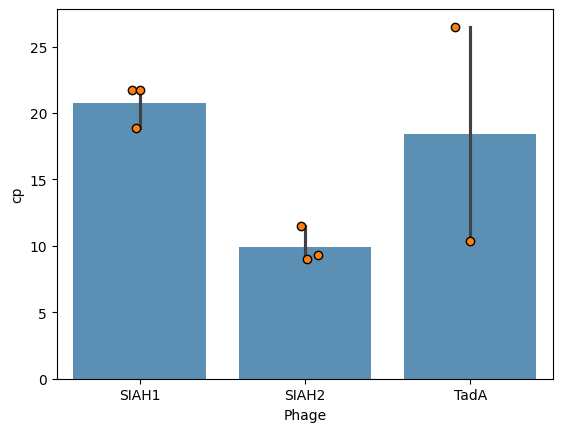

In [ ]:
import seaborn as sns

_ = bars(df[df.strain == 'LB'], x='Phage', y='cp')

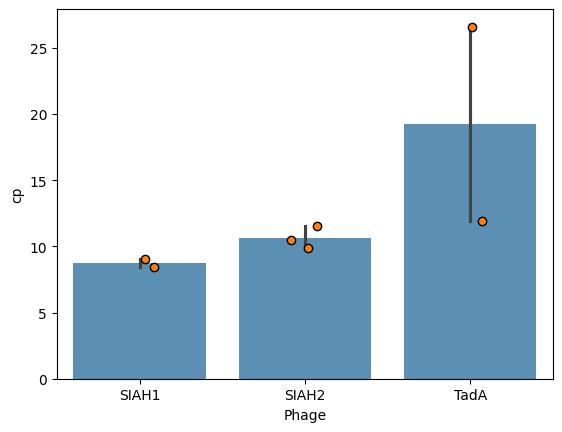

In [ ]:
_ = bars(df[df.strain == 'S2208'], x='Phage', y='cp')

In [ ]:
df['cp_init'] = pd.NA
for phage in df.Phage.unique():
  df.loc[df.Phage == phage, 'cp_init'] = df[(df.Phage == phage) & (df.strain == 'LB')].cp.mean()

df['fc_log2'] = df.cp_init - df.cp
df['fc'] = 2 ** df.fc_log2
df

,well,cp,plate,strain,Phage,promoter,cp_init,fc_log2,fc
0,A1,20.19,plate1,1076-37-DP6,SIAH1,uninduced,20.78,0.59,1.505247
1,A2,18.86,plate1,1076-37-DP6,SIAH1,uninduced,20.78,1.92,3.784231
2,A3,20.47,plate1,1076-37-DP6,SIAH1,uninduced,20.78,0.31,1.239708
3,A5,22.78,plate1,1076-37-DP6,SIAH2,uninduced,9.916667,-12.863333,0.000134
4,A6,23.69,plate1,1076-37-DP6,SIAH2,uninduced,9.916667,-13.773333,0.000071
...,...,...,...,...,...,...,...,...,...
106,E7,18.09,plate2,1113-37-DP6,SIAH2,induced,9.916667,-8.173333,0.003464
107,E9,21.30,plate2,1113-37-DP6,TadA,induced,18.43,-2.87,0.136787
108,E10,22.80,plate2,1113-37-DP6,TadA,induced,18.43,-4.37,0.048361
109,E11,22.71,plate2,1113-37-DP6,TadA,induced,18.43,-4.28,0.051474


In [ ]:
df.Phage.unique()

array(['SIAH1', 'SIAH2', 'TadA', 'SIAH1 + tetracyclin', 'no phages'],
      dtype=object)

## Results


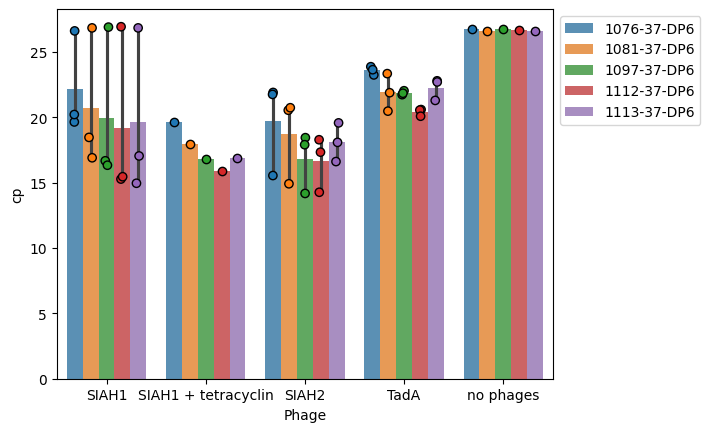

In [ ]:
_ = bars(df[(df.strain != 'S2208') & (df.promoter == 'induced')], x='Phage', y='cp', hue='strain')

In [ ]:
_ = bars(df[(df.strain != 'S2208') & (df.promoter == 'uninduced')], x='Phage', y='cp', hue='strain')

In [ ]:
_ = bars(df[(df.strain != 'S2208') & (df.Phage == 'SIAH1')], x='strain', y='cp', hue='promoter')
plt.xticks(rotation=45)
plt.title('SIAH1')

In [ ]:
df[(df.strain != 'S2208') & (df.promoter == 'induced') & (df.Phage == 'SIAH1')]

## Promoters

In [ ]:
ax = bars(df[(~df.promoter.isna()) & (df.level2 == 2009)], x='phage', y='fc_log2', hue='promoter')
ax.set_title('a-syn tE1')

In [ ]:
ax = bars(df[(~df.promoter.isna()) & (df.level2 == 2008) & (df.substrate == 'asyn')], x='phage', y='fc_log2', hue='promoter')
ax.set_title('a-syn hE1')

In [ ]:
df[(~df.promoter.isna()) & (df.level2 == 2008) & (df.substrate == 'asyn') ]

In [ ]:
ax = bars(df[(~df.promoter.isna()) & (df.level2 == 2008)], x='phage', y='fc_log2', hue='level')
ax.set_title('a-syn hE1')

In [ ]:
ax = bars(df[(df.promoter =='weak') & (df.level2 == 2008)], x='phage', y='fc_log2', hue='strain')
ax.set_title('a-syn hE1 weak promoter')

In [ ]:
ax = bars(df[(df.promoter == 'weak') & (df.level2 == 2008)], x='phage', y='fc_log2', hue='substrate')
ax.set_title('weak promoter hE1')

In [ ]:
ax = bars(df[(df.promoter == 'strong') & (df.level2 == 2008)], x='phage', y='fc_log2', hue='substrate')
ax.set_title('weak promoter hE1')

In [ ]:
ax = bars(df[(df.promoter == 'strong')], x='phage', y='fc_log2', hue='level2')
ax.set_title('strong promoter a-syn')

In [ ]:
df[(df.promoter == 'strong')]